In [1]:
import pandas as pd

In [2]:
instancesHeader = ['GRAPH', 'SOURCE', 'TARGET']

instancesDf = pd.read_csv('netMaker.inst', delimiter=' ', header=None, names=instancesHeader)
instancesDf['GRAPH'] = instancesDf['GRAPH'].apply(lambda x : "5d_" + x.split('/')[-1])
instancesDf

,GRAPH,SOURCE,TARGET
0,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,8326,5528
1,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,4543,5005
2,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,3311,1812
3,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,6160,6000
4,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,6416,5350
...,...,...,...
1375,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,3542,1356
1376,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,2908,3284
1377,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,4683,978
1378,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,4627,2968


In [3]:
resultsHeader = ['ALGO', 'GRAPH','SOURCE', 'TARGET', 'ITERATIONS', 'EXTRACTIONS', 'TARGET_SOLUTIONS', 'TIME', 'MEMORY', 'MAX_HEAP_SIZE']

mdaDf = pd.read_csv('netMaker_5d_mda.csv', delimiter=';', header=None, names=resultsHeader)
martinsDf = pd.read_csv('netMaker_5d_namoa.csv', delimiter=';', header=None, names=resultsHeader)

mergedDf = pd.merge(instancesDf, mdaDf, on=['GRAPH','SOURCE', 'TARGET'], how='left')
mergedDf = pd.merge(mergedDf, martinsDf, on=['GRAPH', 'SOURCE', 'TARGET'], how='left', suffixes=("_mda", "_martins"))
mergedDf
mergedDf.loc[mergedDf['TIME_martins']<0.0001, 'TIME_martins'] = 0.0001
mergedDf.loc[mergedDf['TIME_mda']<0.0001, 'TIME_mda'] = 0.0001

mergedDf['NODES'] = mergedDf['GRAPH'].apply(lambda x : x.split('_')[3][:-1])
mergedDf

,GRAPH,SOURCE,TARGET,ALGO_mda,ITERATIONS_mda,EXTRACTIONS_mda,TARGET_SOLUTIONS_mda,TIME_mda,MEMORY_mda,MAX_HEAP_SIZE_mda,ALGO_martins,ITERATIONS_martins,EXTRACTIONS_martins,TARGET_SOLUTIONS_martins,TIME_martins,MEMORY_martins,MAX_HEAP_SIZE_martins,NODES
0,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,8326,5528,T-MDA,136084.0,136084.0,1535.0,0.7221,3.76,1769.0,NAMOA_LAZY,156002.0,185252.0,1535.0,0.7562,1.0,17163.0,10000
1,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,8326,5528,T-MDA,136084.0,136084.0,1535.0,0.7221,3.76,1769.0,NAMOA_LAZY,156002.0,185252.0,1535.0,0.7257,1.0,17163.0,10000
2,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,8326,5528,T-MDA,136084.0,136084.0,1535.0,0.7221,3.76,1769.0,NAMOA_LAZY,156002.0,185252.0,1535.0,0.8310,1.0,17163.0,10000
3,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,8326,5528,T-MDA,136084.0,136084.0,1535.0,0.7221,3.76,1769.0,NAMOA_LAZY,156002.0,185252.0,1535.0,0.8309,1.0,17163.0,10000
4,5d_netMaker_3o_10000n_1amin_10amax_20i_1s_scor...,8326,5528,T-MDA,136084.0,136084.0,1535.0,0.6900,3.76,1769.0,NAMOA_LAZY,156002.0,185252.0,1535.0,0.7562,1.0,17163.0,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,4683,978,T-MDA,18152509.0,18152509.0,22102.0,6289.8518,2912.69,4972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000
7946,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,4683,978,NaN,18152509.0,18152509.0,22102.0,6294.2340,2912.69,4972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000
7947,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,4627,2968,T-MDA,21220176.0,21220176.0,18312.0,5839.1290,2583.21,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000
7948,5d_netMaker_3o_5000n_5amin_40amax_50i_1s_scorr...,4627,2968,T-MDA,21220176.0,21220176.0,18312.0,5990.3251,2583.21,4900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000


In [4]:
mergedDf['SPEEDUP'] = mergedDf['TIME_martins']/mergedDf['TIME_mda']
#mergedDf['DENSITY'] = mergedDf['ARCS']/mergedDf['NODES']
#mergedDf['DENSITY'] = mergedDf['DENSITY'].apply(lambda x: round(x))
mergedDf['LABELS_PER_SEC_mda'] = mergedDf['EXTRACTIONS_mda']/mergedDf['TIME_mda']
mergedDf['LABELS_PER_SEC_martins'] = mergedDf['EXTRACTIONS_martins']/mergedDf['TIME_martins']

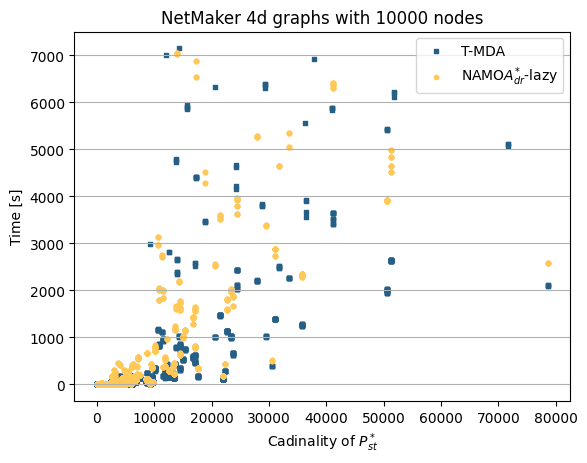

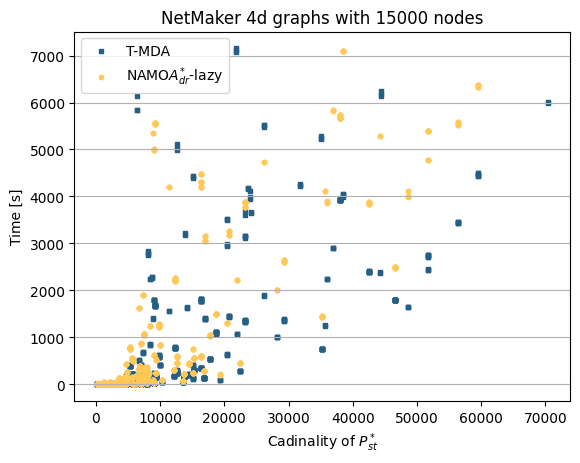

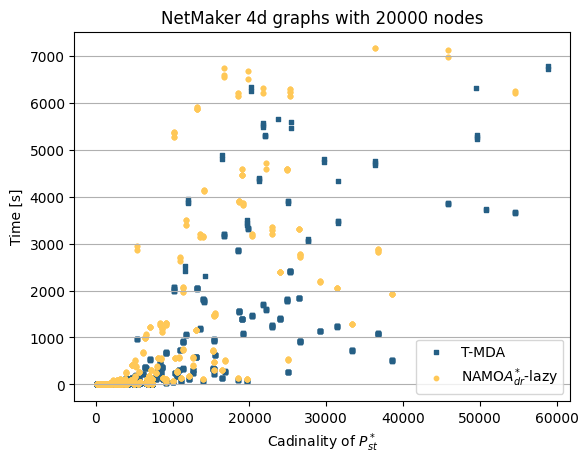

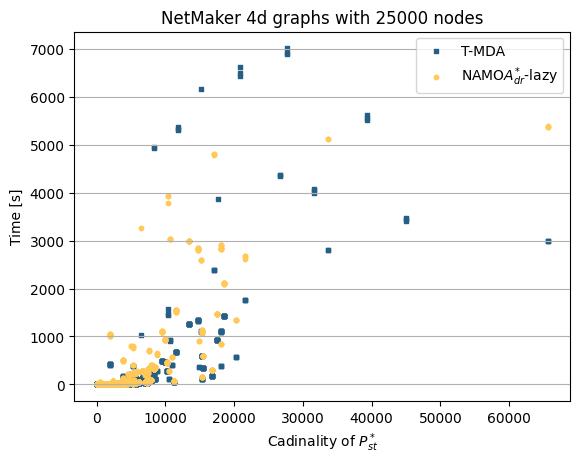

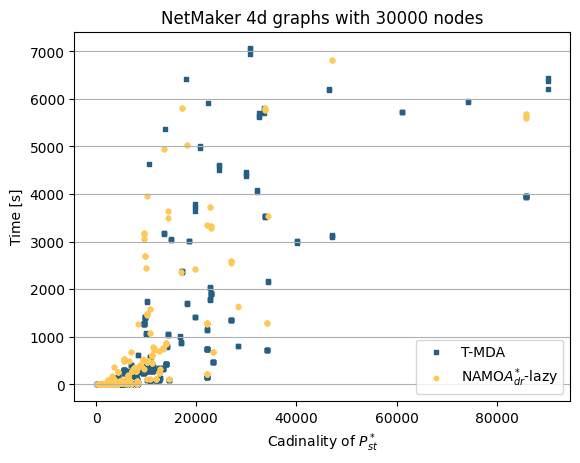

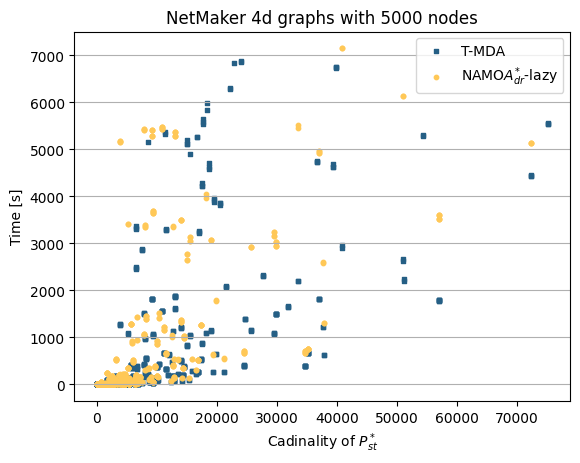

In [5]:
import matplotlib.pyplot as plt
c1 = '#FFC857'
c2 = '#255F85'

for nodes, nodesDf in mergedDf.groupby(by='NODES'):
    fig = plt.figure()
    fig.patch.set_alpha(0.0)
    ax1 = fig.add_subplot(111)

    ax1.scatter(nodesDf['TARGET_SOLUTIONS_mda'], nodesDf['TIME_mda'], s=10, c=c2, marker="s", label='T-MDA')
    ax1.scatter(nodesDf['TARGET_SOLUTIONS_mda'], nodesDf['TIME_martins'], s=10, c=c1, marker="o", label='NAMO$A^{*}_{dr}$-lazy')
    #ax1.set_xticks(densities)
    #ax1.set_yscale('log')
    ax1.yaxis.grid(True)
    plt.ylabel('Time [s]')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Cadinality of $P_{st}^*$')
    plt.legend()
    plt.title(f'NetMaker 4d graphs with {nodes} nodes')
    #plt.savefig(f'./plots/netmaker_3d_martins_mda_time_{nodes}.svg')
    #plt.close()
    plt.show()

In [14]:
from scipy.stats import gmean
print(mergedDf["TARGET_SOLUTIONS_mda"].max())
print(mergedDf["TARGET_SOLUTIONS_martins"].max())

extractionLimits = [0, 100, 1000, 5000, 10000, mergedDf["TARGET_SOLUTIONS_mda"].max()]
extractionLimits
print(f"Group & $|P_{{st}}^*|$ in range & Instances & \
        Instances MDA & avg. $N$ & avg $N_t$ & avg. time MDA & \
        Instances Martins & avg. $N$ & avg. $N_t$ & avg. time Martins & \
        Speedup\\\\")

for graph, graph_df in mergedDf.groupby(by='NODES'):
    localMax = graph_df['TARGET_SOLUTIONS_mda'].max()
    extractionLimits[-1] = localMax
    print(f"\\multirow{{4}}{{*}}{{{graph}}} ")
    for i in range(1, len(extractionLimits)):
        slicedDf = graph_df.loc[(graph_df['TARGET_SOLUTIONS_mda']>extractionLimits[i-1]) & (graph_df['TARGET_SOLUTIONS_mda']<=extractionLimits[i])]
        if len(slicedDf) == 0:
            continue
        print(f"& $({extractionLimits[i-1]}, {extractionLimits[i]}]$ & {len(slicedDf)} & {gmean(slicedDf['TARGET_SOLUTIONS_mda'])}\
            & {gmean(slicedDf['EXTRACTIONS_mda']):.2f} & {gmean(slicedDf['TIME_mda']):.4f} \
            & {gmean(slicedDf['EXTRACTIONS_martins']):.2f} & {gmean(slicedDf['TIME_martins']):.4f} \
            & {gmean(slicedDf['SPEEDUP']):.2f}\\\\")

90223.0
85763.0
Group & $|P_{st}^*|$ in range & Instances &         Instances MDA & avg. $N$ & avg $N_t$ & avg. time MDA &         Instances Martins & avg. $N$ & avg. $N_t$ & avg. time Martins &         Speedup\\
\multirow{4}{*}{10000} 
& $(0, 100]$ & 6 & 32.0            & 182.00 & 0.0001             & 194.00 & 0.0001             & 1.00\\
& $(100, 1000]$ & 122 & 649.0162547591127            & 98315.74 & 0.2358             & 167084.31 & 0.2764             & 1.17\\
& $(1000, 5000]$ & 272 & 2530.5665547094445            & 433309.20 & 3.6566             & 726530.83 & 5.2531             & 1.44\\
& $(5000, 10000]$ & 107 & 6952.775324212529            & 1575994.26 & 43.6934             & nan & nan             & nan\\
& $(10000, 78604.0]$ & 163 & 19741.562219173364            & 7661441.97 & 873.5522             & nan & nan             & nan\\
\multirow{4}{*}{15000} 
& $(100, 1000]$ & 30 & 431.2418304490261            & 51662.19 & 0.0855             & 90384.01 & 0.1014             & 1.19\\
& $(